# Introduction to Neural Force Field

This Jupyter Notebook contains an introduction to the `nff` package. Here, we will load the modules and functions from `nff` to import a dataset, create dataloaders, create a model, train it and check the test stats. We will do most of it manually to illustrate the usage of the API. However, scripts such as the one provided in the `scripts/` folder already automate most of this process.

After the `nff` package has been installed, we start by importing all dependencies for this tutorial.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import sys

# sys.path.insert(0, "/home/saxelrod/Repo/projects/covid_nff/NeuralForceField")
# import torch
# import pdb
# import numpy as np

# from nff.utils.scatter import scatter_add
# from nff.nn.utils import chemprop_msg_update, chemprop_msg_to_node

# h = torch.tensor([[0.5488, 0.7152, 0.6028],
#                 [0.5449, 0.4237, 0.6459],
#                 [0.4376, 0.8918, 0.9637],
#                 [0.3834, 0.7917, 0.5289],
#                 [0.5680, 0.9256, 0.0710],
#                 [0.0871, 0.0202, 0.8326]])
# nbrs = torch.tensor([[1, 2],
#                 [2, 1],
#                 [2, 3],
#                 [3, 2],
#                 [2, 4],
#                 [4, 2]])
# h_12, h_31, h_23, h_32, h_24, h_42 = h

# # m_{vw} = \sum_{k in N(v) \ w} h_{kv}
# # m = [m_{12}, m_{21}, m_{23}, m_{32}, m_{24}, m_{42}]
# # = [0, h_{32} + h_{42}, h_{12} + h_{42}, 0, h_{12} + h_{32},
# #    0]

# m = chemprop_msg_update(h, nbrs)
# print(m)

# # >> tensor([[0.0000, 0.0000, 0.0000],
# #         [0.4706, 0.8119, 1.3615],
# #         [0.6359, 0.7354, 1.4354],
# #         [0.0000, 0.0000, 0.0000],
# #         [0.9323, 1.5069, 1.1317],
# #         [0.0000, 0.0000, 0.0000]])

# expec_m = torch.stack([0 * h_32, h_32+ h_42, h_12 + h_42, h_12 + h_32, 0 *h_12])
# print(expec_m)

# # >> tensor([[0.0000, 0.0000, 0.0000],
# #         [0.4706, 0.8119, 1.3615],
# #         [0.6359, 0.7354, 1.4354],
# #         [0.0000, 0.0000, 0.0000],
# #         [0.9323, 1.5069, 1.1317],
# #         [0.0000, 0.0000, 0.0000]])

In [3]:
# h = torch.tensor([[0.5488, 0.7152, 0.6028],
#                 [0.5449, 0.4237, 0.6459],
#                 [0.4376, 0.8918, 0.9637],
#                 [0.3834, 0.7917, 0.5289],
#                 [0.5680, 0.9256, 0.0710],
#                 [0.0871, 0.0202, 0.8326]])
# nbrs = torch.tensor([[1, 2],
#                 [2, 1],
#                 [2, 3],
#                 [3, 2],
#                 [2, 4],
#                 [4, 2]])
# h_12, h_21, h_23, h_32, h_24, h_42 = h
# num_nodes = 5

# # m_v = \sum_{w \in N(v)} h_{vw}
# # = [m_0, m_1, m_2, m_3, m_4]
# # = [0, h_12, h_21 + h_23 + h_24, h_32 , h_42]

# m = chemprop_msg_to_node(h, nbrs, 5)
# print(m)

# expec_m = torch.stack([torch.zeros_like(h_12),
#             h_12, h_21 + h_23 + h_24, h_32, h_42])

# print(expec_m)

In [4]:
# import os 
# import django


# os.environ["DJANGO_SETTINGS_MODULE"]="djangochem.settings.orgel"

# django.setup()

# from pgmols.models import Species


# from nff.data import Dataset

# main_pth = ("/home/saxelrod/engaging_nfs/data_from_fock/data/"
#        "covid_data/covid_mmff94_1_50k_features.pth.tar")

# # main_pth = ("/home/saxelrod/engaging_nfs/data_from_fock/data/"
# #        "covid_data/all_crest_features.pth.tar")

# newest_dataset = Dataset.from_file(main_pth)

# # old_pth = ("/home/saxelrod/engaging_nfs/data_from_fock/data/"
# #        "covid_data/all_crest_features.pth.tar")
# # old_dataset = Dataset.from_file(old_pth)

In [5]:
# def check_dataset(dataset):
#     bind_idx = []
#     for i, smiles in enumerate(dataset.props['smiles']):
#         print(i)
#         spec = Species.objects.get(smiles=smiles, group__name='covid')
#         bind = spec.mol.details["sars_cov_one_cl_protease_active"]

#         bind_idx.append(i)
#     old_bind_idx = [i for i, bind in enumerate(dataset.props['bind'])]
#     print(bind_idx == old_bind_idx)
# check_dataset(newest_dataset)

In [6]:
# newest_dataset.props['bind'].sum()

In [7]:
# old_bind_idx = torch.LongTensor([i for i, bind in enumerate(old_dataset.props['bind']) if bind ])

# add_props = {}
# for key, val in old_dataset.props.items():
#     if type(val) is list:
#         add_props[key] = [val[i] for i in old_bind_idx]
#     else:
#         add_props[key] = val[old_bind_idx]

       

In [8]:
# for key, val in newest_dataset.props.items():
#     if type(val) is list:
#         newest_dataset.props[key] = val + add_props[key]
#     else:
#         newest_dataset.props[key] = torch.cat((val, add_props[key]), dim=0)

In [9]:
# newest_dataset.save(main_pth)

In [10]:
# import torch

# dataset.props['bind'] = []

# for i, smiles in enumerate(dataset.props['smiles']):
#     spec = Species.objects.get(smiles=smiles, group__name='covid')
#     bind = spec.mol.details["sars_cov_one_cl_protease_active"]
    
#     dataset.props['bind'].append(bind)

    
# dataset.props['bind'] = torch.LongTensor(dataset.props['bind'])



In [11]:
# old_bind_idx = [i for i, bind in enumerate(old_dataset.props['bind']) if bind ]
# new_bind_idx = [i for i, bind in enumerate(dataset.props['bind']) if bind ]

In [12]:
# print(len(old_bind_idx))
# print(len(new_bind_idx))

# print(len([i for i in new_bind_idx if i in old_bind_idx]))

In [13]:
# dataset.save(main_pth)

In [14]:
import sys
sys.path.insert(0, "..")

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve


import torch
from torch.optim import Adam
from torch.utils.data import DataLoader

from nff.data import (Dataset, split_train_validation_test, 
                      collate_dicts, to_tensor, ImbalancedDatasetSampler)
from nff.train import Trainer, get_trainer, get_model, load_model, loss, hooks, metrics, evaluate

from nff.hypopt.data import trim_confs

It might also be useful setting the GPU you want to use:

In [15]:
DEVICE = 0
BATCH_SIZE = 15
MINI_BATCHES = int(50 / BATCH_SIZE)

OUTDIR = './sandbox'

if os.path.exists(OUTDIR):
    newpath = os.path.join(os.path.dirname(OUTDIR), 'backup')
    if os.path.exists(newpath):
        shutil.rmtree(newpath)
        
    shutil.move(OUTDIR, newpath)

## Loading the relevant data

As we usually work with the database, we can pack their information in a class `Dataset`, which is a subclass of `torch.utils.data.Dataset`. It basically wraps information on the atomic numbers, energies, forces and SMILES strings for each one of the geometries. In this example, we already have a pre-compiled `Dataset` to be used. We start by loading this file and creating three slices of the original dataset

In [16]:
import os
base_pth = "/home/saxelrod/engaging_nfs/data_from_fock/data/covid_data/"

main_pth = os.path.join(base_pth, "crest_10_energies_features.pth.tar")



suffixes = ["crest_10_energies_train.pth.tar", "crest_10_energies_val.pth.tar", 
       "crest_10_energies_test.pth.tar"]


pths = [os.path.join(base_pth, suffix) for suffix in suffixes]


if all([os.path.isfile(file) for file in pths]):
    print("Loading from file...")
    train, val, test = [Dataset.from_file(pth) for pth in pths]
    print("Loaded from file.")
else:

    dataset = Dataset.from_file(main_pth)
    # already cleaned
    train, val, test = split_train_validation_test(dataset)
    for pth, dset in zip(pths, [train, val, test]):
        dset.save(pth)

    del dataset

Loading from file...
Loaded from file.


Create loaders:

In [17]:
loaders = []

for split in [train, val, test]:
    props = split.props
    loader = DataLoader(split, batch_size=BATCH_SIZE, 
                        collate_fn=collate_dicts)
    loaders.append(loader)
    
train_loader, val_loader, test_loader = loaders

`nff` is based on SchNet. It parameterizes interatomic interactions in molecules and materials through a series of convolution layers with continuous filters. Here, we are going to create a simple model using the hyperparameters given on `params`:

In [18]:
n_atom_basis = next(iter(train_loader))["atom_features"].shape[-1]
n_bond_features = next(iter(train_loader))["bond_features"].shape[-1]

n_bond_hidden = 300

n_filters = 30

n_gaussians = 10
n_edge_hidden = n_bond_hidden + n_filters
n_mol_basis = 300


mol_fp_drop = 0.0
schnet_dropout = 0.2
cp_dropout = 0.0
readout_drop = 0.2


n_convolutions = 2


input_layers = [{'name': 'linear', 'param': {'in_features': n_bond_features + n_atom_basis,
                                         'out_features': n_bond_hidden}},
            {'name': 'shifted_softplus', 'param': {}}]

output_layers = [{'name': 'linear', 'param': {'in_features': n_atom_basis + n_edge_hidden,
                                         'out_features': n_mol_basis}},
                {'name': 'shifted_softplus', 'param': {}}]

readoutdict = {'energy': [
            {'name': 'linear', 'param' : { 'in_features': n_mol_basis, 'out_features': int(n_mol_basis / 2)}},
            {'name': 'shifted_softplus', 'param': {}},
            {'name': 'Dropout', 'param': {'p': readout_drop}},
            {'name': 'linear', 'param' : { 'in_features': int(n_mol_basis / 2), 'out_features': 1}},
        ]
    }


mol_fp_layers = []



params = {
    'n_atom_basis': n_atom_basis,
    'n_bond_hidden': n_bond_hidden,
    'input_layers': input_layers,
    'output_layers': output_layers,
    'n_filters': n_filters,
    'n_gaussians': n_gaussians,
    'cp_dropout': cp_dropout,
    'schnet_dropout': schnet_dropout,
    'gauss_embed': True,
    'n_convolutions': n_convolutions,
    'cutoff': 5.0,
    'trainable_gauss': True,
    'dropout_rate': schnet_dropout,
    'readoutdict': readoutdict,
    'boltzmann_dict': {'type': 'multiply'},
    'mol_fp_layers': mol_fp_layers,
    'same_filters': True,
    'activation': 'shifted_softplus'
#     'activation': 'ReLU'


}

import pdb
try:
    model = get_model(params, model_type="SchNetFeatures")
except Exception as e:
    print(e)
    pdb.post_mortem()

## Creating a trainer

In [19]:
model

SchNetFeatures(
  (convolutions): ModuleList(
    (0): CpSchNetConv(
      (dense): Dense(
        in_features=300, out_features=300, bias=False
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (activation): shifted_softplus()
      (moduledict): ModuleDict(
        (edge_filter): Sequential(
          (0): GaussianSmearing()
          (1): Dense(
            in_features=10, out_features=30, bias=True
            (dropout): Dropout(p=0.2, inplace=False)
          )
          (2): shifted_softplus()
        )
      )
    )
    (1): CpSchNetConv(
      (dense): Dense(
        in_features=300, out_features=300, bias=False
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (activation): shifted_softplus()
      (moduledict): ModuleDict(
        (edge_filter): Sequential(
          (0): GaussianSmearing()
          (1): Dense(
            in_features=10, out_features=30, bias=True
            (dropout): Dropout(p=0.2, inplace=False)
          )
          (2): shift

To train our model with the data provided, we have to create a loss function. The easiest way to do that is through the `build_mse_loss` builder. Its argument `rho` is a parameter that will multiply the mean square error (MSE) of the force components before summing it with the MSE of the energy.

In [20]:
loss_fn = loss.build_mse_loss(loss_coef={'energy': 1})

We should also select an optimizer for our recently created model:

In [21]:
trainable_params = filter(lambda p: p.requires_grad, model.parameters())
optimizer = Adam(trainable_params, lr=1e-4)

### Metrics and hooks

If we want to monitor the progress of our training, say by looking at the mean absolute error (MAE) of energies and forces, we can simply create metrics to observe them:

In [22]:
train_metrics = [
    metrics.MeanAbsoluteError('energy'),
]

Furthermore, if we want to customize how our training procedure is done, we can use hooks which can interrupt or change the train automatically.

In our case, we are adding hooks to:
* Stop the training procedure after 100 epochs;
* Log the training on a machine-readable CSV file under the directory `./sandbox`;
* Print the progress on the screen with custom formatting; and
* Setup a scheduler for the learning rate.

In [23]:
train_hooks = [
    hooks.MaxEpochHook(1000),
    hooks.CSVHook(
        OUTDIR,
        metrics=train_metrics,
    ),
    hooks.PrintingHook(
        OUTDIR,
        metrics=train_metrics,
        separator = ' | ',
        time_strf='%M:%S'
    ),
    hooks.ReduceLROnPlateauHook(
        optimizer=optimizer,
        patience=10,
        factor=0.5,
        min_lr=1e-7,
        window_length=1,
        stop_after_min=True
    )
]

### Trainer wrapper

A `Trainer` in the `nff` package is a wrapper to train a model. It automatically creates checkpoints, as well as trains and validates a given model. It also allow further training by loading checkpoints from existing paths, making the training procedure more flexible. Its functionalities can be extended by the hooks we created above. To create a trainer, we have to execute the following command:

In [24]:
T = Trainer(
    model_path=OUTDIR,
    model=model,
    loss_fn=loss_fn,
    optimizer=optimizer,
    train_loader=train_loader,
    validation_loader=val_loader,
    checkpoint_intbatcerval=1,
    hooks=train_hooks,
    mini_batches=MINI_BATCHES
)

Now we can finally train the model using the method `train` from the `Trainer`:

In [25]:
import pdb

try:
    T.train(device=DEVICE, n_epochs=1000)
except Exception as e:
    print(e)
    pdb.post_mortem()

 Time | Epoch | Learning rate | Train loss | Validation loss | MAE_energy | GPU Memory (MB)
28:12 |     1 |     1.000e-04 | 23088.4109 |       4897.9023 |    53.9212 |            4061
30:53 |     2 |     1.000e-04 |  3690.1940 |       2552.2852 |    39.0499 |            4671
33:16 |     3 |     1.000e-04 |  2192.9131 |       1656.6727 |    31.5973 |            4671
35:39 |     4 |     1.000e-04 |  1733.8842 |       1069.7027 |    24.8177 |            4671
38:14 |     5 |     1.000e-04 |  1550.4362 |        987.6889 |    24.2713 |            4671
40:59 |     6 |     1.000e-04 |  1377.1630 |       1054.7157 |    25.6341 |            4671
43:30 |     7 |     1.000e-04 |  1220.2908 |       1026.2218 |    25.3897 |            4671
45:58 |     8 |     1.000e-04 |  1170.7210 |        842.8678 |    22.9210 |            4671
48:34 |     9 |     1.000e-04 |  1071.5019 |        856.5335 |    23.4386 |            4671
51:10 |    10 |     1.000e-04 |  1011.0554 |        646.6199 |    19.8188 |     

11:29 |    90 |     5.000e-05 |   349.3555 |         66.6352 |     6.4539 |            4671
13:59 |    91 |     5.000e-05 |   353.7935 |         42.2809 |     4.5690 |            4671
16:42 |    92 |     5.000e-05 |   346.0748 |         48.4871 |     5.0845 |            4671
19:23 |    93 |     5.000e-05 |   352.3165 |         67.3405 |     6.3791 |            4671
21:59 |    94 |     5.000e-05 |   352.3649 |         42.7900 |     4.6581 |            4671
24:25 |    95 |     5.000e-05 |   350.4290 |         41.3079 |     4.5489 |            4671
27:02 |    96 |     5.000e-05 |   357.5725 |         47.7802 |     4.9076 |            4671
29:24 |    97 |     5.000e-05 |   351.8593 |         54.3926 |     5.3949 |            4671
31:52 |    98 |     5.000e-05 |   349.1221 |         41.3437 |     4.3936 |            4671
34:29 |    99 |     5.000e-05 |   356.3612 |         58.3966 |     5.5855 |            4671
37:03 |   100 |     5.000e-05 |   354.2354 |         57.8494 |     5.6257 |     

00:21 |   180 |     6.250e-06 |   331.9856 |         28.4051 |     3.6529 |            4671
02:53 |   181 |     6.250e-06 |   316.0818 |         27.5248 |     3.5524 |            4671
05:15 |   182 |     6.250e-06 |   325.2261 |         29.7635 |     3.8440 |            4671
07:44 |   183 |     6.250e-06 |   328.9020 |         26.8767 |     3.4899 |            4671
10:21 |   184 |     6.250e-06 |   333.0920 |         27.1729 |     3.5136 |            4671
12:45 |   185 |     6.250e-06 |   329.6399 |         26.2051 |     3.4268 |            4671
15:10 |   186 |     6.250e-06 |   325.9619 |         27.7614 |     3.5418 |            4671
17:43 |   187 |     6.250e-06 |   322.4644 |         27.9635 |     3.6043 |            4671
20:18 |   188 |     6.250e-06 |   329.3630 |         26.5368 |     3.4765 |            4671
22:51 |   189 |     6.250e-06 |   324.3759 |         27.3655 |     3.5151 |            4671
25:24 |   190 |     6.250e-06 |   321.3797 |         26.6869 |     3.5090 |     

37:34 |   270 |     7.813e-07 |   317.0620 |         25.9542 |     3.4467 |            4671
39:56 |   271 |     7.813e-07 |   324.3657 |         25.2127 |     3.3497 |            4671
42:21 |   272 |     7.813e-07 |   323.4800 |         25.4195 |     3.3566 |            4671
44:44 |   273 |     7.813e-07 |   326.6131 |         25.3619 |     3.3695 |            4671
47:06 |   274 |     3.906e-07 |   319.9316 |         25.5798 |     3.4041 |            4671
49:29 |   275 |     3.906e-07 |   326.3238 |         25.5432 |     3.3801 |            4671
51:52 |   276 |     3.906e-07 |   322.5545 |         25.5816 |     3.3916 |            4671
54:14 |   277 |     3.906e-07 |   328.8523 |         25.5855 |     3.3896 |            4671
56:36 |   278 |     3.906e-07 |   325.2541 |         25.5323 |     3.3721 |            4671
58:58 |   279 |     3.906e-07 |   324.0221 |         25.4075 |     3.3776 |            4671
01:21 |   280 |     3.906e-07 |   329.9021 |         25.8101 |     3.4246 |     

## Evaluating the model on the test set

Now we have a brand new model trained and validated. We can use the best model from this training to evaluate its performance on the test set. `results` contains the predictions of properties for the whole test dataset. `targets` contains the ground truth for such data. `test_loss` is the loss, calculated with the same function used during the training part

In [31]:
newpath = os.path.join(os.path.dirname(OUTDIR), 'backup')
if os.path.exists(newpath):
    shutil.rmtree(newpath)

shutil.move(OUTDIR, os.path.join(os.path.dirname(OUTDIR), "pretrain"))

'./pretrain'

In [26]:
results, targets, val_loss = evaluate(model, test_loader, loss_fn, device=DEVICE)


In [27]:
res_energy = torch.cat(results['energy']).reshape(-1).detach().cpu().numpy()
targ_energy = torch.cat(targets['energy']).reshape(-1).detach().cpu().numpy()
mae = np.mean(abs(res_energy-targ_energy))

print("MAE is %.2f kcal/mol" % mae)

MAE is 3.37 kcal/mol


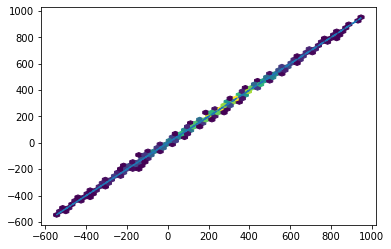

In [29]:
plt.plot(targ_energy, targ_energy, '--')
plt.hexbin(targ_energy, 
           res_energy, 
           gridsize=50,
           cmap='viridis',
           mincnt=1)
plt.show()